In [1]:
from ising import *
import matplotlib.pyplot as plt
import numpy as np
from acf import acf_multi

In [2]:
J = 1
h = 0
size = 1000
n_steps = 10_000_000
params = {'beta': np.linspace(0.5, 3, 6), 'estimate': np.empty(6), 'exact' : np.empty(6), 'tau' : np.empty(6)}

In [3]:
for i, beta in enumerate(params['beta']):
    configuration = np.random.choice([-1, 1], size)
    params['estimate'][i]= monte_carlo(n_steps=n_steps, beta=beta, J=J, h=0, configuration=configuration)[0][-1]
    params['exact'][i] = exact_energy(beta, J, N= size)

In [4]:
SE = (params['estimate'] -  params['exact']).std()/np.sqrt(6)

In [5]:
np.abs(SE*100/params['estimate'].mean())

1.1287864441567188

In [6]:
for i, beta in enumerate(params['beta']):
    corr = acf_multi(300, size, n_steps, beta, J, h)
    tau = 1/2
    for c in corr:
        tau += c
        if i >= 6 * tau:
            break
        else:
            continue
    params['tau'][i] = tau
    

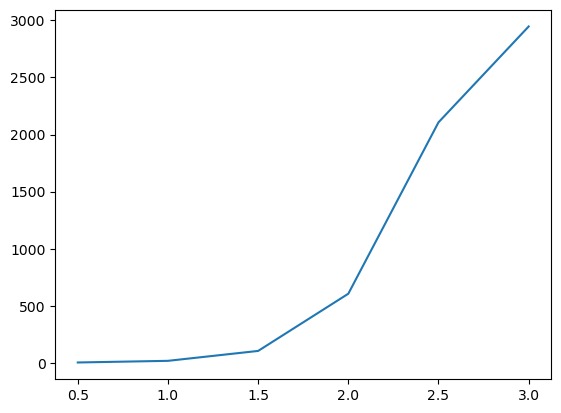

In [7]:
plt.plot(params['beta'], params['tau'])